# 06/12/20 - This notebook explores the estimation of velocity dispersion of candidates as a funciton of stellar mass, with a fit taken from Zihad(2016), where:
# ---
# $\sigma(M_*) = \sigma_b * (M_* / M_b)^{\alpha}$
#
## For z < 0.2: (SDSS fit)
### $\sigma = 10^{2.073} (M_*/ 10^{10.26} M_{\odot})^{\alpha}$
### where $\alpha = 0.403$ if $M_* <= 10^{10.26}$, or $\alpha = 0.293$ otherwise
## For z > 0.2: (SHELS fit)
### $\sigma = 10^{2.071} (M_* / 10^{10.26} M_{\odot})^{0.281}$

In [6]:
#libraries

%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import colors as colors
#import matplotlib.text as text
#import matplotlib.lines as lines
import numpy as np
#from numpy.polynomial.polynomial import polyfit
import pandas as pd
#from matplotlib_venn import venn3, venn3_circles
import matplotlib.lines as lines
from astropy import constants as const
#from astropy.io import fits
#import astropy.coordinates as coord
import astropy.units as u
#from astropy.table import Table
# import ephem
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

In [7]:
# sanity check... slacs candidate 1525(etc.) has vel disp 150 km/s. theta_e 1.31
# zlens = 0.15, source 0.73
Dlens=cosmo.angular_diameter_distance(0.15).value
Dsource=cosmo.angular_diameter_distance(0.73).value
print(1-Dlens/Dsource)
theta_e = (150/186)**2 * (0.645)
theta_e # 0.419... slacs calculated 1.31!

0.6451677004521008


0.4194849115504682

In [8]:
# try this again???

# create velocity disperions estimator
def calculate_sigma (z, mass):
    mb = 10**(10.26)
    if z < 0.2: # SDSS fit
        sigma_b = 10**(2.073)
        if mass < mb:
            alpha = 0.403
        else:
            alpha = 0.293
        sigma = sigma_b * ( mass / mb ) ** (alpha)
    elif (z >= 0.2) & (z < 0.7): # SHELS fit
        sigma_b = 10**(2.071)
        alpha = 0.281
        sigma = sigma_b * ( mass / mb ) ** (alpha)
    else:
        print(f'Redshift out of range. {z}')
        sigma = 0
    return sigma
            

In [48]:
z1 = np.linspace(0.1, 0.65, 10)
mass1 = 10**(np.linspace(9.5, 12, 10))
z =[]
mass = []
def calculate_sigmas (z, mass):
    sigmas = []
    for i in range(len(z)):
        sigma = calculate_sigma(z[i], mass[i])
        sigmas.append(sigma)
    return sigmas
    #print(sigmas)

In [49]:
calculate_sigmas(z1, mass1)
#sigmas

[58.441317755738595,
 75.62483575513482,
 103.16944900287172,
 123.48285630320615,
 147.79584410084237,
 176.89590431763747,
 211.7255810183932,
 253.412999190093,
 303.308404443293,
 363.0278971479567]

In [50]:
calculate_sigma(0.3, 10**(10.5))

137.54347738119625

In [9]:
# load in data

spec = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_latest.csv')
mac = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')
zoo = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_latest.csv')

In [52]:
spec['sigma'] = calculate_sigmas(z= spec.z_lens, mass = spec.STELLAR_MASS)
mac['sigma'] = calculate_sigmas(z = mac.Z, mass = mac.STELLAR_MASS)
zoo['sigma'] = calculate_sigmas(z = zoo.Z, mass = zoo.STELLAR_MASS)

Redshift out of range. 0.7215999960899353


In [53]:
print(spec.sigma.mean(),
      mac[mac.sigma > 0].sigma.mean(),
      zoo.sigma.mean())

160.95495785637405 236.54117815766205 172.69879274193764


In [54]:
mac.sigma

0     265.717604
1     259.648833
2       0.000000
3     250.962957
4     235.048435
5     263.772729
6     271.386687
7     207.321227
8     222.092727
9     231.634974
10    252.369551
11    204.536204
12    243.522847
13    229.186553
14    279.291311
15    276.440713
16    268.777693
17    239.144431
18    131.946582
19    179.814964
20    236.525638
21    214.797345
22    189.400102
23    275.803793
24    186.102433
25    224.567899
26    211.408846
27    244.205827
28    267.359316
29    215.922716
30    188.050452
31    206.677069
32    265.339511
33    274.872488
34    200.260846
35    262.704719
36    227.347571
37    196.967165
38    222.056856
39    235.389055
40    306.795305
41    257.190365
42    286.362571
43    281.268779
44    289.190486
45    174.261157
46    227.448867
Name: sigma, dtype: float64

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/pyth

(1.5, 2.5)

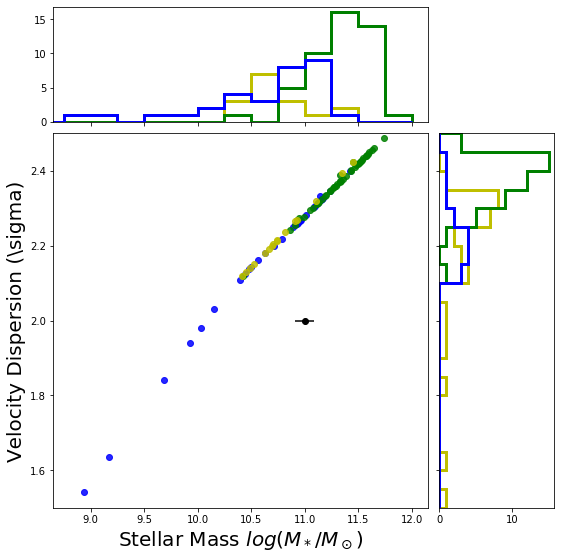

In [55]:
# Three-panel plot
from matplotlib.ticker import NullFormatter
nullfmt   = NullFormatter()         # no labels
# definitions for the axes
left, width = 0.1, 0.65
lower, height = 0.1, 0.65
lower_h = left_h = left+width+0.02
    
rect_scatter = [left, lower, width, height]
rect_histx = [left, lower_h, width, 0.2]
rect_histy = [left_h, lower, 0.2, height]
    
    # start with a rectangular Figure
plt.figure(1, figsize=(8,8))
    
axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)
    
    # no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plots
axScatter.set_xlim(8.65,12.15)
axScatter.set_ylim(1.5,2.5)
axScatter.plot(np.log10(spec.STELLAR_MASS), np.log10(spec.sigma), 
               'bo',label='GAMA Spectroscopy - 47 candidates', alpha = 0.85)
#axScatter.plot(np.log10(3.6425e+10), 0.1968, 'b*',label='Median GAMA', ms = 20, fillstyle = 'none')
#axScatter.plot(np.log10(spec.max_stellar_mass_salpeter), spec.z1, 'b^',label='GAMA Spec 2-arcsec Aperture Max Mass', fillstyle='none')
axScatter.plot(np.log10(mac.STELLAR_MASS), np.log10(mac.sigma), 
               'go',label='LinKS Machine Learning - 47 candidates', alpha = 0.85)
#axScatter.plot(np.log10(2.00e+11),0.19, 'g*',label='Median SLACS', ms = 20, fillstyle = 'none')
axScatter.plot(np.log10(zoo.STELLAR_MASS), np.log10(zoo.sigma), 
               'yo',label='GalaxyZoo Citizen Science - 29 candidates', alpha = 0.85)
#axScatter.plot(np.log10(9.662e+09),0.1076, 'y*',label='Median GalaxyZoo Population', ms=20, fillstyle = 'none')
#axScatter.plot(np.log10(decals.STELLAR_MASS), decals.Z, 'rs',label='DECALS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(slacs.STELLAR_MASS), slacs.Z, 'cs',label='SLACS - 2 candidates', fillstyle = 'none')
#axScatter.plot(np.log10(s4tm.STELLAR_MASS), s4tm.Z, 'ms',label='S4TM - 1 candidate', fillstyle = 'none')

# plot two overlaps
G136604 = mac[mac.GAMA_ID == 136604]
G124486 = mac[mac.GAMA_ID == 124486]
axScatter.plot(np.log10(G136604.STELLAR_MASS), G136604.sigma, 'ks', label='Overlap ML/GZ - G136604', fillstyle = 'none')
axScatter.plot(np.log10(G124486.STELLAR_MASS), G124486.sigma, 'kD', label='Overlap ML/GZ - G124486', fillstyle = 'none')

#axScatter.plot(9.5,0.4, 'ko')
axScatter.errorbar(11.0, 2.0,  
                   xerr= 0.09,
                  fmt = 'o',
                   color = 'black',
                   solid_capstyle = 'round',
                  label = 'Stellar Mass Mean Error ~ 0.09 dex')

#axScatter.legend(loc='best', numpoints=1, fontsize = 12)
    
    
# now determine nice limits by hand:
binwidth = 0.5
bins=20
#xbins = np.arange(min(zoo_hard_cut.STELLAR_MASS),max(zoo_hard_cut.STELLAR_MASS), (max(zoo_hard_cut.STELLAR_MASS)-min(zoo_hard_cut.STELLAR_MASS))/bins)
#ybins = np.arange(min(zoo_hard_cut.Z),max(zoo_hard_cut.Z), (max(zoo_hard_cut.Z)-min(zoo_hard_cut.Z))/bins)

#axScatter.set_xlim((min(zoo.STELLAR_MASS)-0.5, max(zoo.STELLAR_MASS)+0.5))
#axScatter.set_ylim((min(zoo.Z)-0.05, max(zoo.Z)+0.05))
axScatter.axis([8.65,12.15,1.5,2.5], prop={'size':25})

axScatter.set_xlabel(r'Stellar Mass $log(M_*/M_\odot)$', fontsize=20)
axScatter.set_ylabel(r'Velocity Dispersion (\sigma)', fontsize=20)
    
#xbins = np.arange(8.5, 12.5, xbinwidth)
#ybins = np.arange(0., 0.6, ybinwidth)
    
axHisty.hist(np.log10(spec.sigma), orientation='horizontal', 
             range=[1.5,2.5], bins=bins,color='y', histtype = 'step', linewidth=3)
axHisty.hist(np.log10(mac.sigma), orientation='horizontal', 
             range=[1.5,2.5], bins=bins,color='g', histtype = 'step', linewidth=3)
axHisty.hist(np.log10(zoo.sigma), orientation='horizontal', 
             range=[1.5,2.5],  bins=bins,color='b',  histtype = 'step', linewidth=3)
    
axHistx.hist(np.log10(zoo.STELLAR_MASS), range=[7,12], 
             bins=bins,color='y', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(mac.STELLAR_MASS), range=[7,12], 
             bins=bins,color='g', histtype = 'step', linewidth=3)
axHistx.hist(np.log10(spec.STELLAR_MASS), range=[7,12], 
             bins=bins,color='b', histtype = 'step', linewidth=3)
    
axHistx.set_xlim( axScatter.get_xlim() )
axHisty.set_ylim( axScatter.get_ylim() )

#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/121519_all_methods_medians_maxmasses_additional_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/050420_bp_overlaps.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/bp_overlaps_060920..pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/veldisp_stellar_mass.png')

In [56]:
np.log10(zoo.sigma.min())

2.1194308414873904

# Einstein Radius of Isothermal Sphere:
## $\theta_E = 4\pi\sigma^2 D_{SL} / (D_S c^2$)

In [57]:
spec['D_source'] = 0
spec['D_lens'] = 0
for i in range(len(spec)):
    if spec.D1[i] < spec.D2[i]:
        spec.D_source[i] = spec.D2[i]
        spec.D_lens[i] = spec.D1[i]
    else:
        spec.D_source[i] = spec.D1[i]
        spec.D_lens[i] = spec.D2[i]
    
spec['theta_e_veldisp'] = 206265 * 4 * np.pi * (spec.sigma)**2 * (spec.D_source - spec.D_lens) / (spec.D_source * c**2)
spec.theta_e_veldisp

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shawn/minicon

0     0.218652
1          NaN
2     0.250109
3     0.219634
4     0.306403
5          NaN
6     0.419019
7     0.247211
8     0.110471
9          NaN
10    0.227255
11    0.218140
12    0.144671
13         NaN
14    0.273981
15    0.229014
16    0.192943
17         NaN
18    0.251248
19    0.212063
20         NaN
21         NaN
22         NaN
23    0.024189
24         NaN
25    0.381471
26    0.750172
27    0.376155
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33    0.484068
34         NaN
35         NaN
36    0.362361
37    0.430439
38    0.256526
39    0.138860
40    0.219301
41    0.025995
42    0.344412
43    0.273347
44    0.113693
45    0.134028
46    0.345686
Name: theta_e_veldisp, dtype: float64

In [58]:
slacs = pd.read_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/slacs_Auger2009.csv')

In [59]:
print(np.mean(1-cosmo.angular_diameter_distance(slacs.zlens).value/cosmo.angular_diameter_distance(slacs.zsrc).value),
np.median(1-cosmo.angular_diameter_distance(slacs.zlens).value/cosmo.angular_diameter_distance(slacs.zsrc).value))

0.5097487407058243 0.5128491883044617


In [60]:
# if D_L is halfway to D_S, then D_LS/D_S = 1/2... So it's a 2 instead of a 4.
# if I use the mean D_LS/D_S from SLACS... it is also 1/2... :( 
mac['theta_e_veldisp'] = 206265 * 2 * np.pi * (mac.sigma)**2 / c**2
mac.theta_e_veldisp

0     1.018133
1     0.972158
2     0.000000
3     0.908204
4     0.796670
5     1.003284
6     1.062041
7     0.619800
8     0.711267
9     0.773699
10    0.918413
11    0.603260
12    0.855152
13    0.757430
14    1.124809
15    1.101966
16    1.041719
17    0.824678
18    0.251050
19    0.466247
20    0.806716
21    0.665307
22    0.517278
23    1.096894
24    0.499423
25    0.727209
26    0.644481
27    0.859956
28    1.030753
29    0.672296
30    0.509933
31    0.615954
32    1.015238
33    1.089498
34    0.578304
35    0.995176
36    0.745323
37    0.559438
38    0.711037
39    0.798981
40    1.357255
41    0.953835
42    1.182487
43    1.140794
44    1.205958
45    0.437890
46    0.745988
Name: theta_e_veldisp, dtype: float64

In [61]:
zoo['theta_e_veldisp'] = 206265 * 2 * np.pi * (zoo.sigma)**2 / c**2
zoo.theta_e_veldisp

0     0.360972
1     0.384690
2     0.631296
3     0.332047
4     0.488406
5     0.499423
6     0.881244
7     0.275454
8     1.015238
9     0.249934
10    0.368290
11    0.349597
12    0.262238
13    0.288236
14    0.389081
15    0.426988
Name: theta_e_veldisp, dtype: float64

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(1.325, 12.4, '2 PSF')

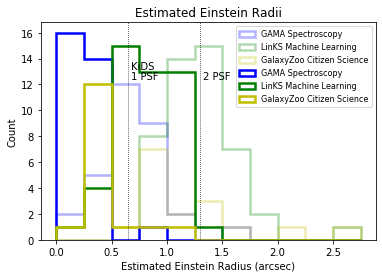

In [62]:
# Histogram of Einstein Radii
plt.xlabel("Estimated Einstein Radius (arcsec)")
plt.ylabel("Count")
plt.title("Estimated Einstein Radii")

#plt.ylim(0,14.5)

plt.hist(spec.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5, alpha = 0.3)
plt.hist(mac.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5, alpha = 0.3)
plt.hist(zoo.theta_e_Ang_slide,bins=11,range=[0.0,2.75],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5, alpha = 0.3)

plt.hist(spec.theta_e_veldisp,bins=11,range=[0.0,2.75],
         color='b',label='GAMA Spectroscopy', 
         histtype = 'step', linewidth=2.5)#, alpha = 0.4)
plt.hist(mac.theta_e_veldisp,bins=11,range=[0.0,2.75],
         color='g',label='LinKS Machine Learning', 
         histtype = 'step', linewidth=2.5)#, alpha = 0.4)
plt.hist(zoo.theta_e_veldisp,bins=11,range=[0.0,2.75],
         color='y',label='GalaxyZoo Citizen Science', 
         histtype = 'step', linewidth=2.5)#, alpha = 0.4)
#plt.hist(slacs.theta_e_sie,bins=10,color='c',label='SLACS (Bolton-08)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(s4tm.theta_e_sie,bins=10,color='m',label='S4TM (Shu-17)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.hist(bells.theta_e_sie,bins=10,color='k',label='BELLS (Brownstein-12)', histtype = 'step', linestyle='dashed', linewidth=1, alpha=0.5)
#plt.fill_betweenx(x1=0.1, x2=0.2, y=(0,15),# Fill region for false candidates
 #                facecolor="purple", # The fill color
  #               color='purple',       # The outline color
   #              alpha=0.15, # Transparency of the fill
    #            label='NextGen Resolution')

plt.legend(loc='upper right', fontsize=8)

plt.axvline(0.65, color='k', linestyle='dotted', linewidth=0.75)
plt.axvline(1.3, color='k', linestyle='dotted', linewidth=0.75)
#plt.axvline(1.95, color='k', linestyle='dashed', linewidth=1)
#plt.axvline(1, color='b', linestyle='solid', linewidth=1)
#plt.axvline(1, color='g', linestyle='dashed', linewidth=1)
#plt.axvline(0.1, color='k', linestyle='dashed', linewidth=0.75)
#plt.axvline(0.2, color='k', linestyle='dashed', linewidth=0.75)


plt.text(0.675, 12.4, '1 PSF')
plt.text(0.675, 13.2, 'KiDS')
plt.text(1.325, 12.4, '2 PSF')
#plt.text(-0.06, 13.2, '0.1-0.2 arcsec')
#plt.text(0.125, 13.2, 'JWST')
#plt.text(0.125, 12.4, 'Euclid')
#plt.text(2, 11, '3 PSF')
#plt.text(1.05, 12, 'GAMA aperture', color='b', fontsize=8)
#plt.text(1.05, 13, 'minimum from training set Petrillo-2019', color = 'g', fontsize=8)
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/PNGs/theta_e_veldisp_062620.png')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/theta_e_060920..pdf')


In [63]:
zoo[zoo.theta_e_veldisp < 0.65]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,...,theta_e_Ang,f_dm,theta_e_H0_slide,theta_e_Ang_slide,f_dm_half_re,theta_e_Ang_slide_half_re,lensing_mass_half_effective_radius,theta_e_half_radius,sigma,theta_e_veldisp
0,0,1,1,1,1,485873,217.75015,-1.80042,0.349456,4.908000e+10,...,1.527035,0.499818,1.349573,1.348395,0.435487,0.762767,2.541110e+10,0.686184,158.217689,0.360972
1,1,5,5,5,5,84050,175.79849,0.47814,0.365758,5.471000e+10,...,1.081179,0.505949,0.964887,0.960603,0.441618,0.543399,2.910557e+10,0.492475,163.332854,0.384690
2,2,6,7,7,7,55245,181.07958,-0.31553,0.314054,1.274000e+11,...,1.863550,0.553672,1.746717,1.741993,0.489342,0.985420,8.372487e+10,0.943444,209.235150,0.631296
3,3,7,8,8,8,70282,179.40308,0.12562,0.655352,4.256000e+10,...,1.004631,0.491770,0.883225,0.880053,0.427440,0.497833,2.126399e+10,0.443466,151.746078,0.332047
4,4,8,9,9,9,185451,180.28326,-1.61006,0.302985,8.222000e+10,...,1.393063,0.528947,1.272172,1.267559,0.464617,0.717040,4.843001e+10,0.667685,184.038379,0.488406
5,5,9,10,10,10,124486,179.72998,-2.51919,0.426190,8.541000e+10,...,1.227565,0.531096,1.126910,1.119528,0.466766,0.633301,5.079004e+10,0.591169,186.102433,0.499423
7,7,15,17,17,17,93310,219.92276,0.50731,0.575139,3.094000e+10,...,0.754649,0.473768,0.653593,0.649663,0.409437,0.367505,1.427391e+10,0.320102,138.210950,0.275454
9,9,17,19,19,19,600421,135.49058,0.28417,0.420189,2.621000e+10,...,1.089838,0.464401,0.930877,0.929982,0.400070,0.526077,1.160049e+10,0.452792,131.653025,0.249934
10,10,18,20,20,20,574423,135.75994,-0.20038,0.464337,5.079000e+10,...,1.557765,0.501751,1.379388,1.378197,0.437421,0.779626,2.652256e+10,0.702996,159.813334,0.368290
11,11,19,21,21,21,324764,137.20387,1.72633,0.422757,4.647000e+10,...,1.064959,0.496732,0.940675,0.937488,0.432402,0.530323,2.373332e+10,0.475289,155.704654,0.349597


In [285]:
mac[mac.theta_e_veldisp < 0.65]

,Unnamed: 0,Unnamed: 0.1,GAMA_ID,ID,RA,DEC,SCORE,STELLAR_MASS,Z,theta_e,theta_e_H0,theta_e_Ang,f_dm,theta_e_H0_slide,theta_e_Ang_slide,sigma,theta_e_veldisp
2,2,2,323152.0,2967.0,130.54643,1.64325,30.0,8.277000e+11,0.7216,1.715374,1.715374,1.354724,0.659323,1.835354,1.449480,0.000000,0.0000
18,18,18,165409.0,3098.0,181.19672,-2.72009,38.0,2.641000e+10,0.0196,1.859202,1.859202,1.858993,0.464830,1.587132,1.586953,131.946582,0.5021


# NOTE! A LinKS candidate has theta-e = 0 because it is beyond the applicable redshift range. I should probably have just taken it anyway and made note of it. That is what I will do if I put this in the paper.

In [64]:
#spec.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/spec_latest.csv')
#mac.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/mac_latest.csv')
#zoo.to_csv('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Files/zoo_latest.csv')

In [65]:
spec.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'RA', 'DEC', 'z1', 'z2', 'spec_type', 'GAMA_ID',
       'STELLAR_MASS', 'max_total_mass', 'theta_e', 'Z',
       'max_stellar_mass_salpeter', 'max_stellar_mass_chabrier', 'Dz',
       'theta_e2', 'z_lens', 'theta_e_reckoning', 'theta_e_Ang', 'theta_e_H0',
       'f_dm', 'theta_e_H0_slide', 'theta_e_Ang_slide', 'D1', 'D2',
       'fiber_radius_mass', 'fiber_radius_stellar_mass', 'f_dm_half_re',
       'theta_e_Ang_slide_half_re', 'mass_half_effective_radius',
       'lensing_mass_half_effective_radius', 'theta_e_half_radius', 'sigma',
       'D_source', 'D_lens', 'theta_e_veldisp'],
      dtype='object')

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2., 5., 8., 7., 5., 2., 1., 0., 0., 1.]),
 array([0.02418893, 0.09678727, 0.16938562, 0.24198396, 0.3145823 ,
        0.38718065, 0.45977899, 0.53237734, 0.60497568, 0.67757402,
        0.75017237]),
 <a list of 10 Patch objects>)

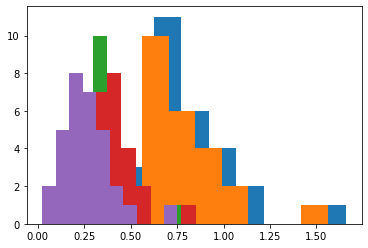

In [66]:
plt.hist(spec.theta_e_Ang)
plt.hist(spec.theta_e_Ang_slide)
plt.hist(spec.theta_e_Ang_slide_half_re)
plt.hist(spec.theta_e_half_radius)
plt.hist(spec.theta_e_veldisp)

(array([ 1.,  1.,  0.,  5.,  8., 10.,  5.,  9.,  7.,  1.]),
 array([0.        , 0.13572549, 0.27145098, 0.40717647, 0.54290196,
        0.67862746, 0.81435295, 0.95007844, 1.08580393, 1.22152942,
        1.35725491]),
 <a list of 10 Patch objects>)

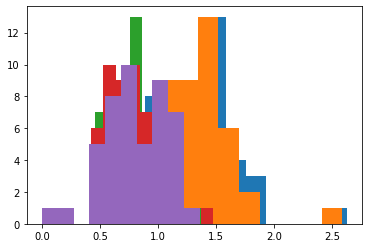

In [67]:
plt.hist(mac.theta_e_Ang)
plt.hist(mac.theta_e_Ang_slide)
plt.hist(mac.theta_e_Ang_slide_half_re)
plt.hist(mac.theta_e_half_radius)
plt.hist(mac.theta_e_veldisp)

# Calculate velocity dispersion from Petrillo.
$ \sigma_* = 10^{0.22\log{M_*-0.1}} $

In [14]:
spec['sigma_petrillo'] = 10 ** (0.22 * np.log10(spec.STELLAR_MASS)-0.1)
(spec.sigma_petrillo/186) ** 2 * (1-spec.D_lens/spec.D_source)

0     0.299852
1          NaN
2     0.308572
3     0.354767
4     0.378686
5          NaN
6     0.495468
7     0.285503
8     0.265496
9          NaN
10    0.296303
11    0.291093
12    0.282621
13         NaN
14    0.320620
15    0.284112
16    0.207100
17         NaN
18    0.290944
19    0.264536
20         NaN
21         NaN
22         NaN
23    0.089196
24         NaN
25    0.500723
26    0.822816
27    0.463530
28         NaN
29         NaN
30         NaN
31         NaN
32         NaN
33    0.560738
34         NaN
35         NaN
36    0.436937
37    0.527283
38    0.329857
39    0.248669
40    0.258440
41    0.116545
42    0.470034
43    0.309646
44    0.163285
45    0.189632
46    0.423038
dtype: float64

In [12]:
spec.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'RA', 'DEC', 'z1', 'z2',
       'spec_type', 'GAMA_ID', 'STELLAR_MASS', 'max_total_mass', 'theta_e',
       'Z', 'max_stellar_mass_salpeter', 'max_stellar_mass_chabrier', 'Dz',
       'theta_e2', 'z_lens', 'theta_e_reckoning', 'theta_e_Ang', 'theta_e_H0',
       'f_dm', 'theta_e_H0_slide', 'theta_e_Ang_slide', 'D1', 'D2',
       'fiber_radius_mass', 'fiber_radius_stellar_mass', 'f_dm_half_re',
       'theta_e_Ang_slide_half_re', 'mass_half_effective_radius',
       'lensing_mass_half_effective_radius', 'theta_e_half_radius', 'sigma',
       'D_source', 'D_lens', 'theta_e_veldisp', 'sigma_petrillo'],
      dtype='object')